In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from data_sources.get import get_indicators

In [3]:
raw_df = get_indicators(["SP.POP.GROW"])

df = raw_df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
df = df.pivot(index="Year", values="Value", columns="Country Name")
df = df.loc[2000:2018]
df.head()

Country Name  Afghanistan  Africa Eastern and Southern  \
Year                                                     
2000             2.975057                     2.612276   
2001             3.902805                     2.614605   
2002             4.496719                     2.619586   
2003             4.668344                     2.629364   
2004             4.321560                     2.645811   

Country Name  Africa Western and Central   Albania   Algeria  American Samoa  \
Year                                                                           
2000                            2.707532 -0.637357  1.358417        1.335501   
2001                            2.701705 -0.938470  1.309830        1.169282   
2002                            2.699589 -0.299877  1.275072        0.988330   
2003                            2.706139 -0.374149  1.275918        0.705060   
2004                            2.723453 -0.417931  1.317809        0.317170   

Country Name   Andorra    Angola  Antigua and Barbuda  Arab World  ...  \
Year                                                               ...   
2000          1.575273  3.277215             1.769347    2.152846  ...   
2001          2.944447  3.301174             1.572944    2.156238  ...   
2002          3.936691  3.329262             1.396717    2.161010  ...   
2003          4.374144  3.378794             1.285477    2.188473  ...   
2004          4.109526  3.452988             1.297792    2.241337  ...   

Country Name  Uzbekistan   Vanuatu  Venezuela, RB   Vietnam  \
Year                                                          
2000            1.383747  2.023426       1.888612  1.100433   
2001            1.265969  2.269101       1.859317  1.035893   
2002            1.223832  2.462958       1.825034  0.976001   
2003            1.163675  2.562200       1.781682  0.936607   
2004            1.153769  2.561895       1.726465  0.920602   

Country Name  Virgin Islands (U.S.)  West Bank and Gaza     World  \
Year                                                                
2000                       0.039587            2.555236  1.323057   
2001                      -0.085639            2.555268  1.297604   
2002                      -0.036857            2.555285  1.276474   
2003                      -0.003686            2.555248  1.261517   
2004                      -0.035950            2.555276  1.254303   

Country Name  Yemen, Rep.    Zambia  Zimbabwe  
Year                                           
2000             2.842666  2.679390  0.495778  
2001             2.883500  2.617671  0.356424  
2002             2.889559  2.580537  0.254517  
2003             2.892727  2.564747  0.233334  
2004             2.881931  2.577387  0.314072  

[5 rows x 265 columns]

In [4]:
countries_with_nans = df.isna().count()[df.isna().any() == True]
countries_with_nans

Series([], dtype: int64)

In [5]:
df_cleared = df.drop(columns=countries_with_nans.index.values)
len(df_cleared.columns)

265

In [6]:
countries = [
    "Poland",
    "Ukraine",
    "Czech Republic",
    "Zimbabwe",
    "China",
    "United States",
    "Russian Federation",
    "Japan",
    "France",
]
df_to_visualise = df_cleared.loc[:, countries]
df_to_visualise.head()

Country Name    Poland   Ukraine  Czech Republic  Zimbabwe     China  \
Year                                                                   
2000         -1.044335 -1.006579       -0.280414  0.495778  0.787957   
2001         -0.027587 -1.050921       -0.375720  0.356424  0.726381   
2002         -0.046319 -0.949639       -0.192902  0.254517  0.670000   
2003         -0.067493 -0.811376       -0.028621  0.233334  0.622861   
2004         -0.058513 -0.758571        0.030435  0.314072  0.593933   

Country Name  United States  Russian Federation     Japan    France  
Year                                                                 
2000               1.112769           -0.420615  0.167276  0.684946  
2001               0.989741           -0.424091  0.240953  0.727790  
2002               0.927797           -0.460024  0.232527  0.727227  
2003               0.859482           -0.453781  0.213981  0.708771  
2004               0.925484           -0.402681  0.033662  0.736333

<AxesSubplot:xlabel='Year', ylabel='Population growth (%)'>

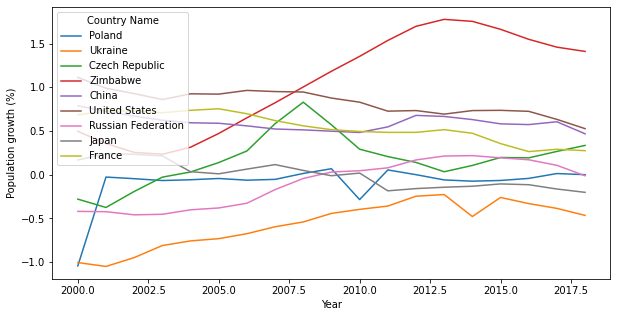

In [7]:
df_to_visualise.plot(figsize=(10, 5), ylabel="Population growth (%)")

In [8]:
X_base = df_cleared.values.T
X_base.shape

(265, 19)

In [9]:
countries = df_cleared.columns.values
countries.shape

(265,)

In [10]:
years = df_cleared.index.values
years.shape

(19,)

In [11]:
import time


def run_and_measure(fun, *args, **kwargs):
    start = time.time()
    retval = fun(*args, **kwargs)
    end = time.time()
    return retval, end - start

# Data preprocessing

In [12]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_base)

# def preprocess(X):
#     # return scaler.transform(X)
#     return X - 1.

# def preprocess_inverse(X):
#     # return scaler.inverse_transform(X)
#     return X + 1.

In [13]:
from sklearn.preprocessing import normalize

norm_feature = None


def preprocess(X):
    global norm_feature
    X, norm_feature = normalize(X, return_norm=True)
    return X


def preprocess_inverse(X):
    return np.multiply(X, norm_feature[:, None])

In [14]:
X = preprocess(X_base)

In [15]:
MAE_SCALE = 10_000

# PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

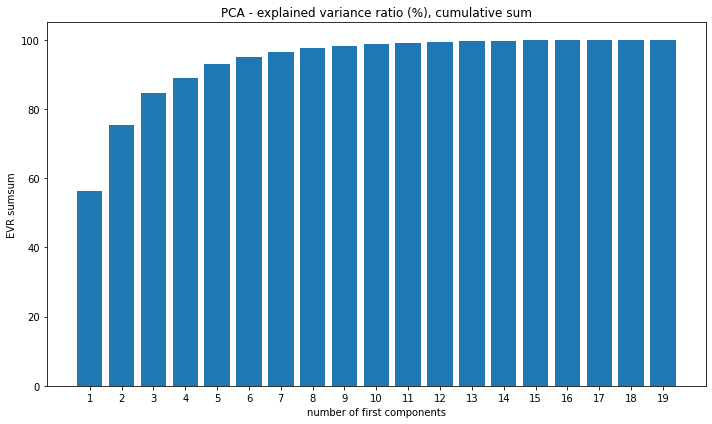

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(1, pca.explained_variance_ratio_.shape[0] + 1),
    pca.explained_variance_ratio_.cumsum() * 100,
)
plt.gca().set_xticks(np.arange(1, 20, 1))
plt.title("PCA - explained variance ratio (%), cumulative sum")
plt.xlabel("number of first components")
plt.ylabel("EVR sumsum")
plt.tight_layout()
plt.savefig("plots/experiments/pca_variance.pdf")
plt.show()

First  1 components: mae=589.608337
First  2 components: mae=396.234421
First  3 components: mae=291.831801
First  4 components: mae=240.043638
First  5 components: mae=153.276492
First  6 components: mae=126.542012
First  7 components: mae=108.653352
First  8 components: mae=96.093848
First  9 components: mae=78.856137
First 10 components: mae=68.816499
First 11 components: mae=58.471183
First 12 components: mae=51.880513
First 13 components: mae=44.013002
First 14 components: mae=34.880274
First 15 components: mae=23.691107
First 16 components: mae=17.292478
First 17 components: mae=12.465394
First 18 components: mae=6.920746
First 19 components: mae=0.000000


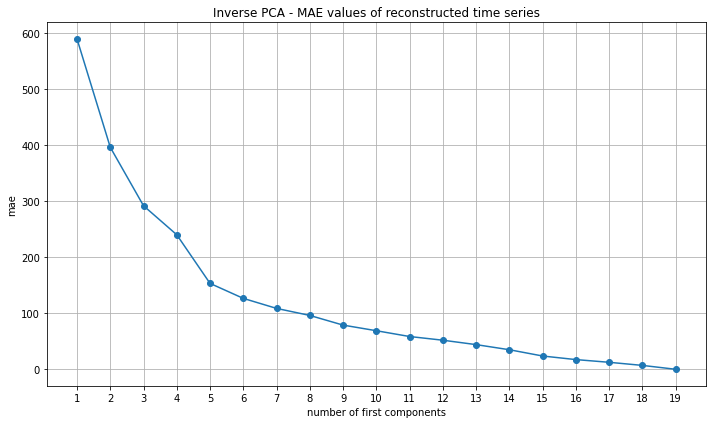

In [18]:
from sklearn.metrics import mean_absolute_error

mae_list = []

for i in range(1, 20):
    X_tmp = X_pca[:, :i] @ pca.components_[:i] + pca.mean_
    mae = mean_absolute_error(X, X_tmp) * MAE_SCALE
    mae_list.append(mae)
    print(f"First {i:2} components: mae={mae:0.6f}")

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, pca.explained_variance_ratio_.shape[0] + 1), mae_list, marker="o")
plt.gca().set_xticks(np.arange(1, 20, 1))
plt.title("Inverse PCA - MAE values of reconstructed time series")
plt.xlabel("number of first components")
plt.ylabel("mae")
plt.tight_layout()
plt.grid()
plt.savefig("plots/experiments/pca_mae.pdf")
plt.show()

In [19]:
INDICES = [10, 40, 50, 100, 200]

# for i in range(1, 11):
#     plt.figure(figsize=(26, 3))

#     X_tmp = X_pca[:, :i] @ pca.components_[:i] + pca.mean_
#     mae_list = [mean_absolute_error(x, x_tmp) * MAE_SCALE for x, x_tmp in zip(X, X_tmp)]
#     X_tmp = preprocess_inverse(X_tmp)

#     indices = INDICES + [np.argmax(mae_list)]
#     for j, idx in enumerate(indices):
#         plt.subplot(1, len(indices), j + 1)
#         plt.plot(years, X_base[idx], label="true")
#         plt.plot(years, X_tmp[idx], label="transformed")
#         plt.title(f"{idx:3}, mae: {mae_list[idx]:0.6f}", fontsize=10)

#     plt.suptitle(f"{i} first components")
#     plt.legend()
#     plt.show()

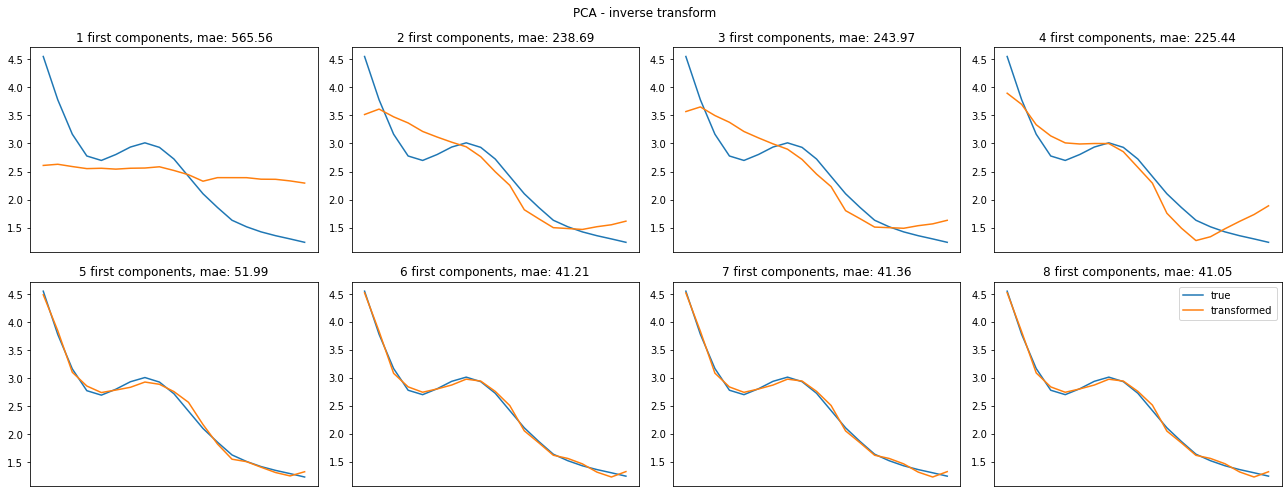

In [20]:
IDX = 40

plt.figure(figsize=(18, 7))
for i in range(1, 9):
    X_tmp = X_pca[:, :i] @ pca.components_[:i] + pca.mean_
    mae_list = [mean_absolute_error(x, x_tmp) * MAE_SCALE for x, x_tmp in zip(X, X_tmp)]
    X_tmp = preprocess_inverse(X_tmp)

    plt.subplot(2, 4, i)
    plt.plot(years, X_base[IDX], label="true")
    plt.plot(years, X_tmp[IDX], label="transformed")

    plt.xticks([])
    plt.title(f"{i} first components, mae: {mae_list[IDX]:.2f}")

plt.suptitle("PCA - inverse transform")
plt.legend()
plt.tight_layout()
plt.savefig("plots/experiments/pca_reconstructions.pdf")
plt.show()

# Autoencoder v1

In [21]:
import tensorflow as tf
from tensorflow.keras import layers as tf_layers

TRAIN_AUTOENCODERS = False

In [22]:
def test_autoencoder(
    create_model,
    n_start,
    n_end,
    name,
    batch_size=128,
    n_epochs=500,
    train=True,
    lr_start=0.001,
    lr_patience=None,
):
    histories = {}
    models = {}

    for n_bottleneck in range(n_start, n_end):
        print(f"Starting {n_bottleneck}... ", end="")

        autoencoder_model = create_model(n_bottleneck, lr=lr_start)
        models[n_bottleneck] = autoencoder_model

        if train:
            callbacks = []
            if lr_patience is not None:
                callbacks.append(
                    tf.keras.callbacks.ReduceLROnPlateau(
                        monitor="loss",
                        factor=0.5,
                        patience=lr_patience,
                        min_delta=0.00005,
                    )
                )

            history, t = run_and_measure(
                autoencoder_model.fit,
                X,
                X,
                batch_size=batch_size,
                verbose=0,
                epochs=n_epochs,
                callbacks=callbacks,
            )
            print(f"{t:0.2f} s")
            history = history.history
            autoencoder_model.save_weights(
                f"model_checkpoints/{name}/{n_bottleneck}/weights"
            )
            pd.DataFrame(history).to_csv(
                f"model_checkpoints/{name}/{n_bottleneck}/log.csv"
            )
        else:
            history = pd.read_csv(f"model_checkpoints/{name}/{n_bottleneck}/log.csv")
            autoencoder_model.load_weights(
                f"model_checkpoints/{name}/{n_bottleneck}/weights"
            )
            print()

        histories[n_bottleneck] = history

    return histories, models


def plot_histories(histories, title, ymax=400, n_epochs=500, print_mae=True):
    plt.figure(figsize=(12, 8))

    for n_bottleneck, history in histories.items():
        plt.plot(np.arange(1, n_epochs + 1), history["loss"], label=f"{n_bottleneck}")

    plt.ylim(0, ymax)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.savefig(f"plots/experiments/training_{title}.pdf")
    plt.show()

    for n_bottleneck, history in histories.items():
        print(f"n_bottleneck={n_bottleneck:2}: mae={min(history['loss']):0.6f}")


def plot_transformed_data_autoencoder(X_base, X, models, indices=INDICES, inverse=True):
    for i, (n_bottleneck, model) in enumerate(models.items()):
        plt.figure(figsize=(26, 3))

        X_tmp = model.predict(X)

        mae_list = [
            mean_absolute_error(x, x_tmp) * MAE_SCALE for x, x_tmp in zip(X, X_tmp)
        ]
        current_indices = indices + [np.argmax(mae_list)]

        if inverse:
            X_tmp = preprocess_inverse(X_tmp)

        for j, idx in enumerate(current_indices):
            plt.subplot(1, len(current_indices), j + 1)
            plt.plot(years, X_base[idx], label="true")
            plt.plot(years, X_tmp[idx], label="transformed")
            plt.title(f"{idx:3}, mae: {mae_list[idx]:0.6f}", fontsize=10)

        plt.suptitle(f"n_bottleneck={n_bottleneck}")
        plt.legend()
        plt.show()

In [23]:
def create_autoencoder_v1(n_bottleneck, lr=0.001):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=lr), loss="mae", loss_weights=MAE_SCALE
    )
    return autoencoder

In [24]:
n_epochs_1 = 1200
histories_autoencoder_v1, models_autoencoder_v1 = test_autoencoder(
    create_autoencoder_v1,
    1,
    9,
    name="autoencoder_v1",
    n_epochs=n_epochs_1,
    train=TRAIN_AUTOENCODERS,
    lr_start=0.004,
    lr_patience=80,
)

Starting 1... 
Starting 2... 
Starting 3... 
Starting 4... 
Starting 5... 
Starting 6... 
Starting 7... 
Starting 8... 


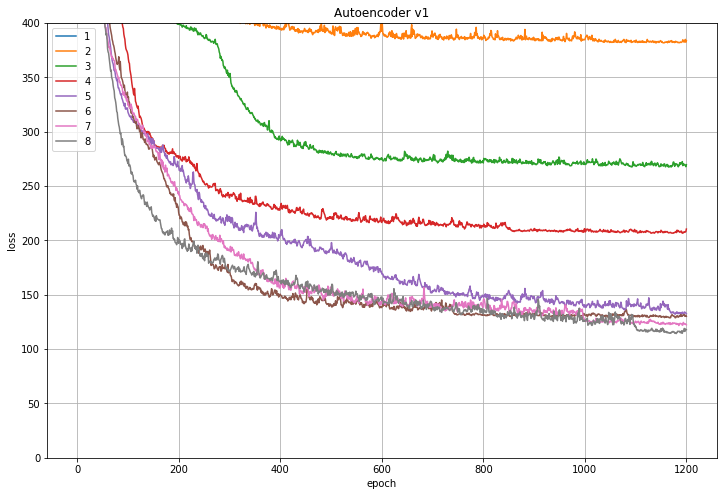

n_bottleneck= 1: mae=577.994202
n_bottleneck= 2: mae=381.675903
n_bottleneck= 3: mae=267.368744
n_bottleneck= 4: mae=206.604660
n_bottleneck= 5: mae=132.025375
n_bottleneck= 6: mae=128.754623
n_bottleneck= 7: mae=121.684532
n_bottleneck= 8: mae=114.275177


In [25]:
plot_histories(histories_autoencoder_v1, "Autoencoder v1", n_epochs=n_epochs_1)

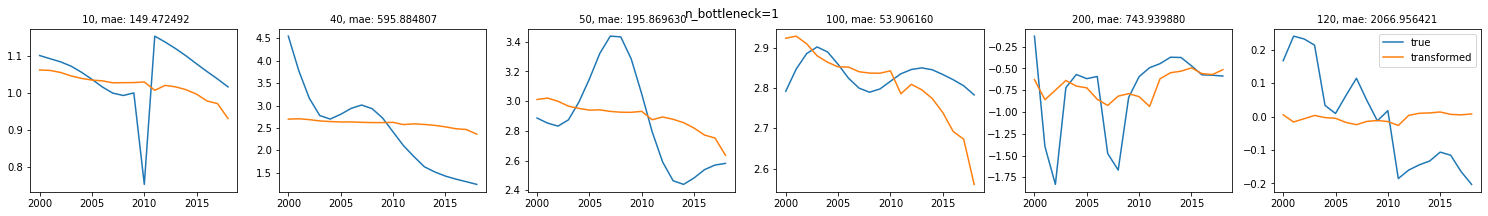

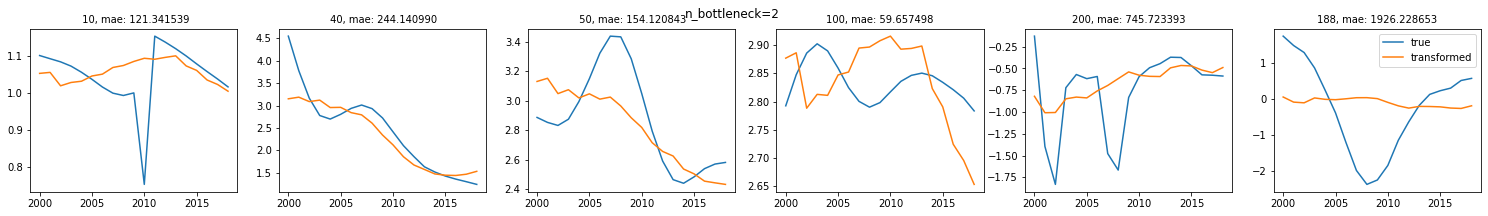

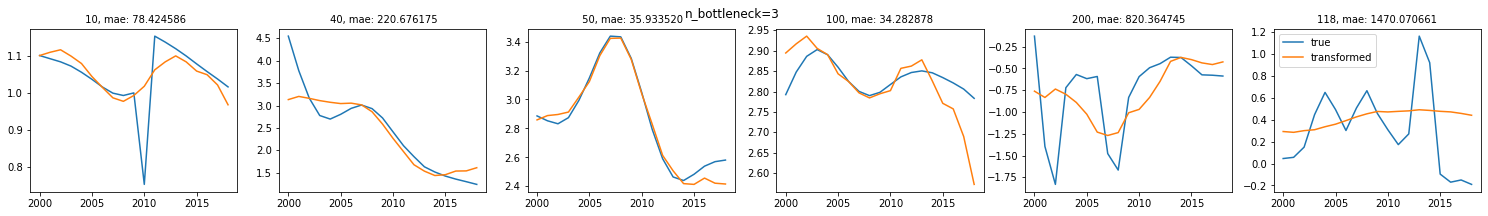

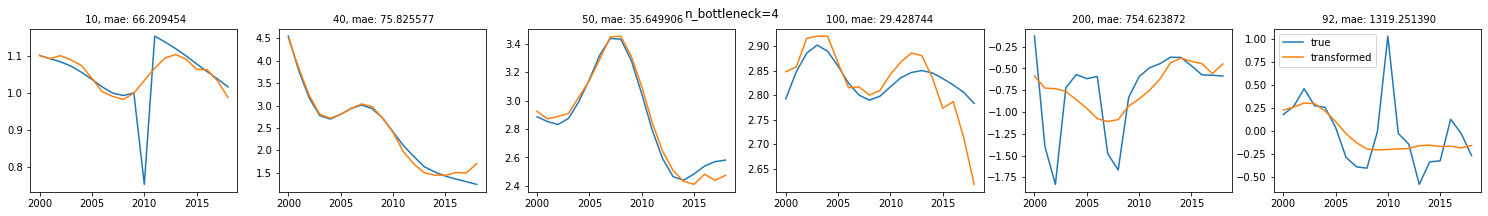

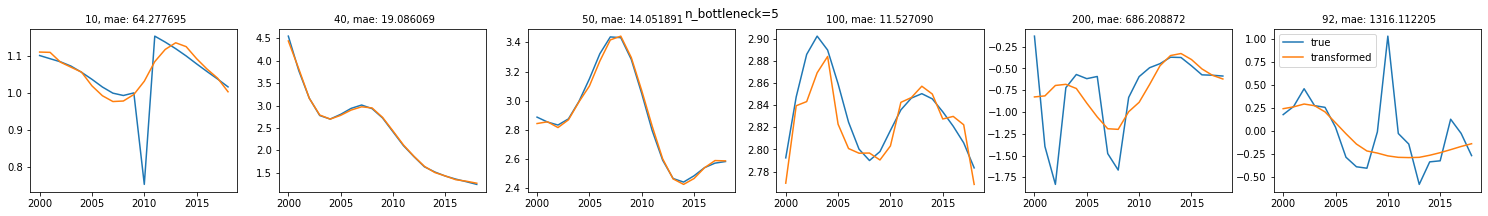

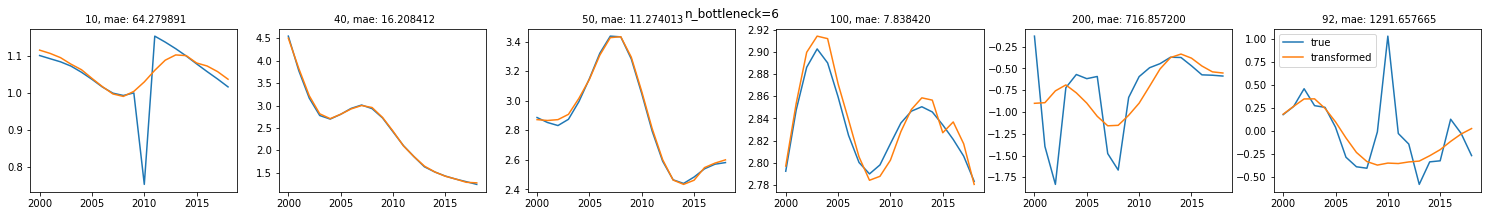

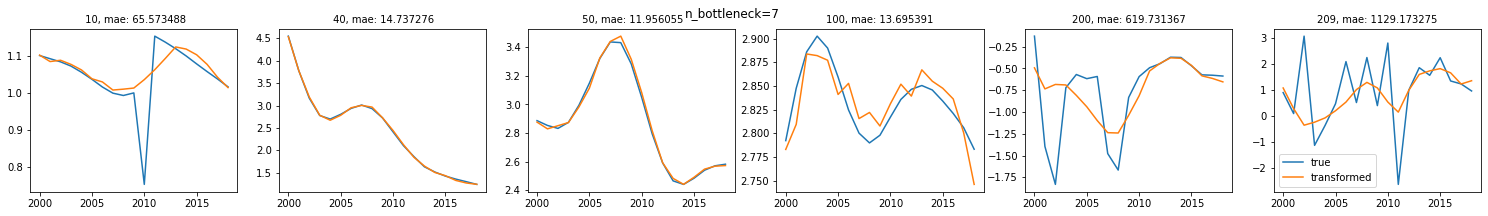

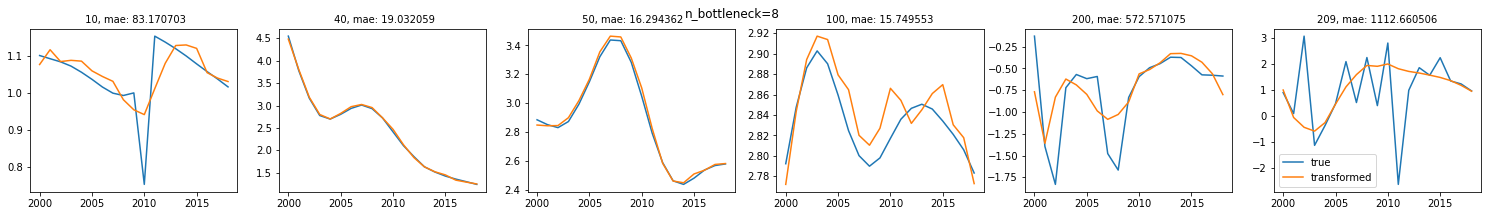

In [26]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v1)

# Autoencoder v2

In [27]:
def create_autoencoder_v2(n_bottleneck, lr=0.001):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=lr), loss="mae", loss_weights=MAE_SCALE
    )
    return autoencoder

In [28]:
n_epochs_2 = 2000
histories_autoencoder_v2, models_autoencoder_v2 = test_autoencoder(
    create_autoencoder_v2,
    1,
    9,
    name="autoencoder_v2",
    n_epochs=n_epochs_2,
    train=TRAIN_AUTOENCODERS,
    lr_start=0.004,
    lr_patience=100,
)

Starting 1... 
Starting 2... 
Starting 3... 
Starting 4... 
Starting 5... 
Starting 6... 
Starting 7... 
Starting 8... 


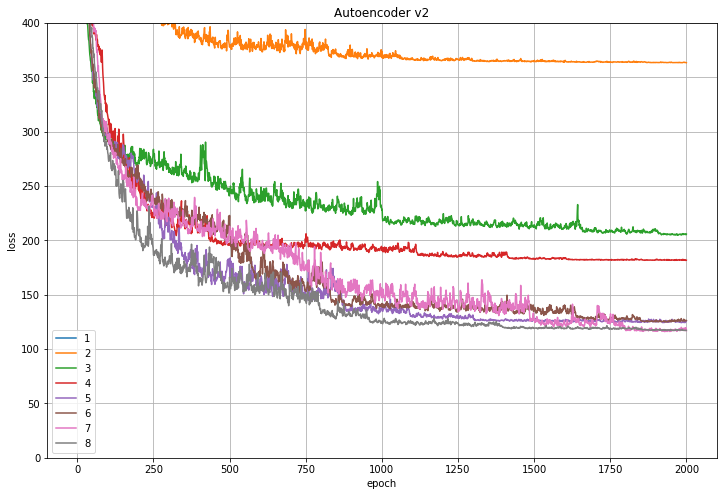

n_bottleneck= 1: mae=413.924011
n_bottleneck= 2: mae=363.411682
n_bottleneck= 3: mae=204.803711
n_bottleneck= 4: mae=181.535294
n_bottleneck= 5: mae=124.306763
n_bottleneck= 6: mae=124.964371
n_bottleneck= 7: mae=116.131226
n_bottleneck= 8: mae=117.099510


In [29]:
plot_histories(histories_autoencoder_v2, "Autoencoder v2", n_epochs=n_epochs_2)

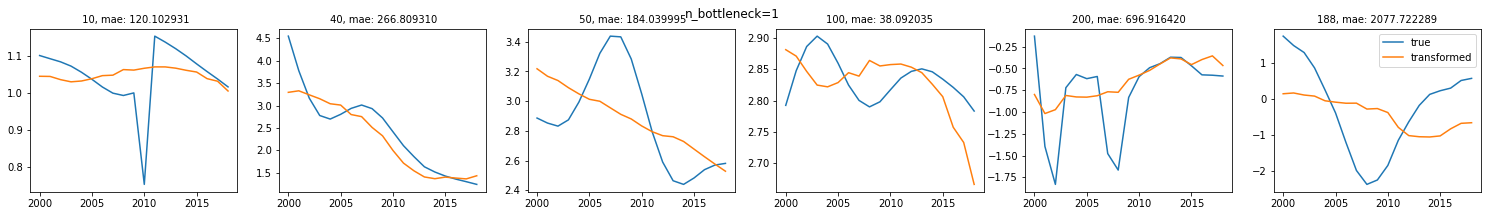

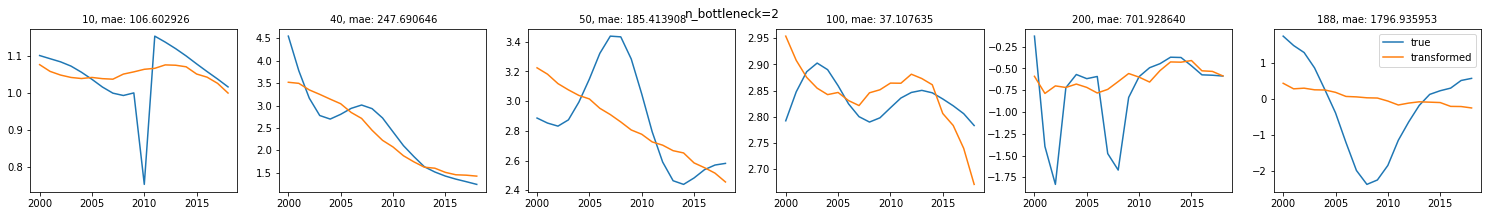

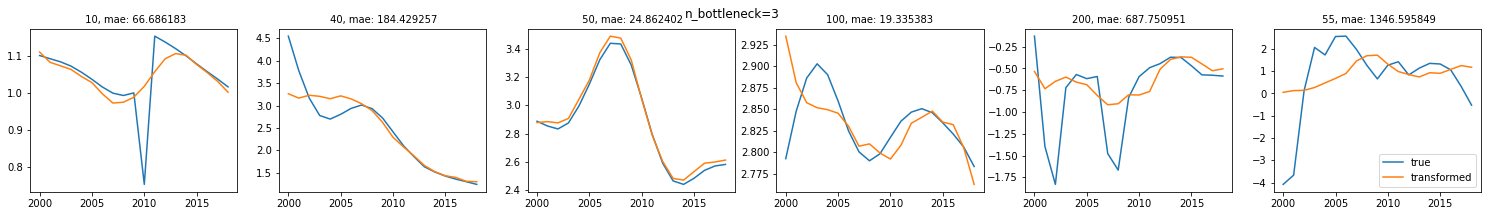

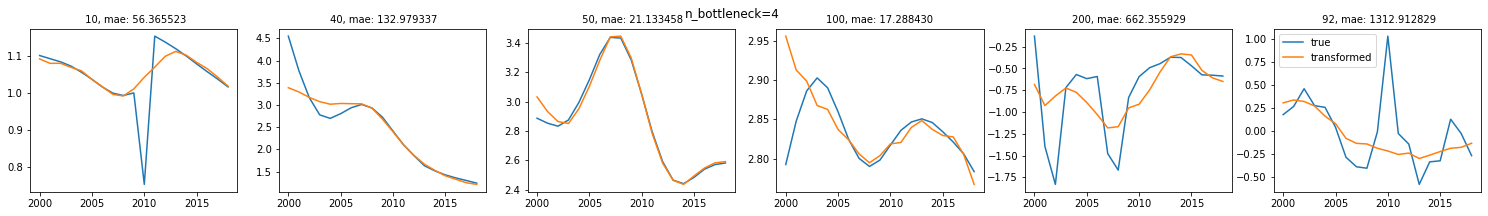

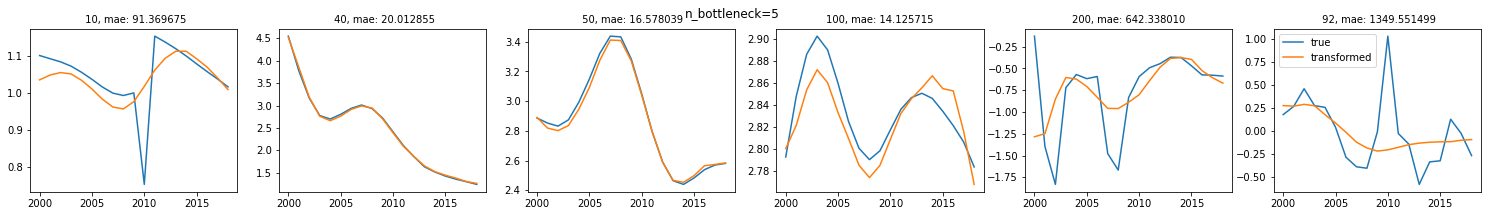

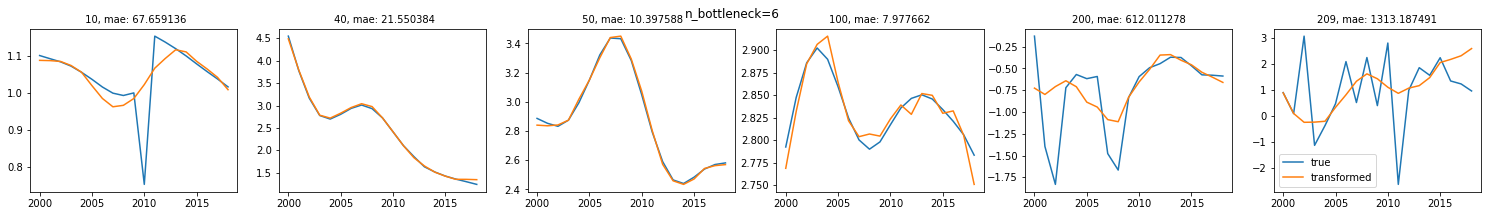

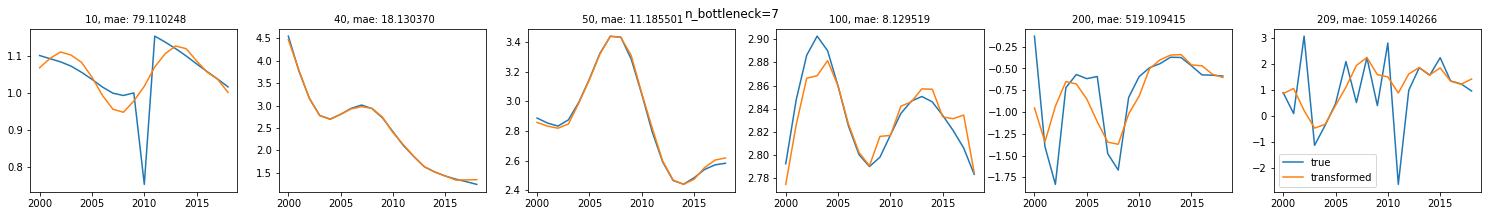

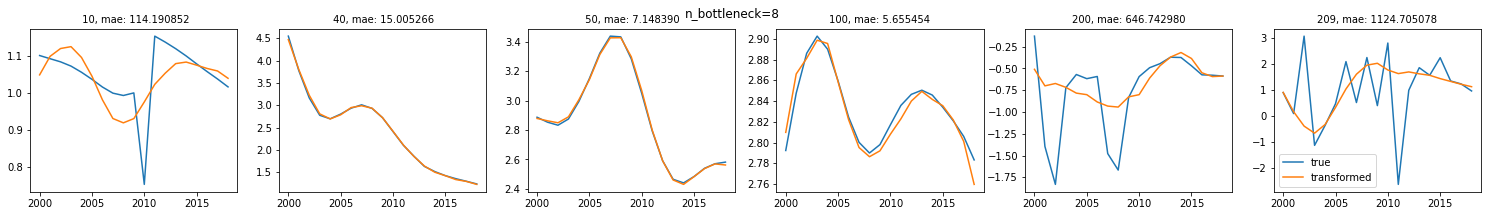

In [30]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v2)

# Autoencoder v3

In [31]:
def create_autoencoder_v3(n_bottleneck, lr=0.001):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Dense(80, activation="relu"),
            tf_layers.Dense(40, activation="relu"),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(40, activation="relu"),
            tf_layers.Dense(80, activation="relu"),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=lr), loss="mae", loss_weights=MAE_SCALE
    )
    return autoencoder

In [32]:
n_epochs_3 = 5000
histories_autoencoder_v3, models_autoencoder_v3 = test_autoencoder(
    create_autoencoder_v3,
    1,
    9,
    name="autoencoder_v3",
    n_epochs=n_epochs_3,
    train=TRAIN_AUTOENCODERS,
    lr_start=0.004,
    lr_patience=110,
)

Starting 1... 
Starting 2... 
Starting 3... 
Starting 4... 
Starting 5... 
Starting 6... 
Starting 7... 
Starting 8... 


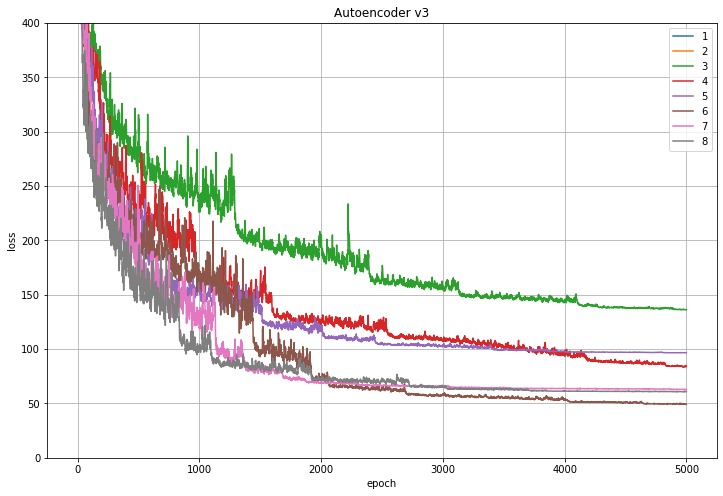

n_bottleneck= 1: mae=403.691223
n_bottleneck= 2: mae=844.002075
n_bottleneck= 3: mae=136.134460
n_bottleneck= 4: mae=83.650459
n_bottleneck= 5: mae=96.579514
n_bottleneck= 6: mae=49.170208
n_bottleneck= 7: mae=62.936321
n_bottleneck= 8: mae=60.756462


In [33]:
plot_histories(histories_autoencoder_v3, "Autoencoder v3", n_epochs=n_epochs_3)

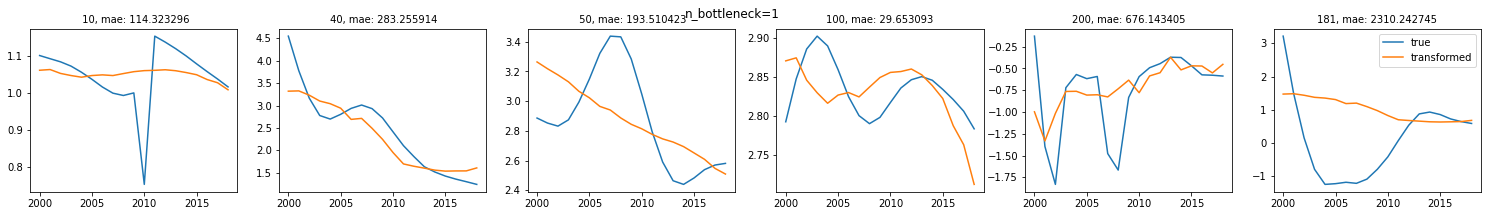

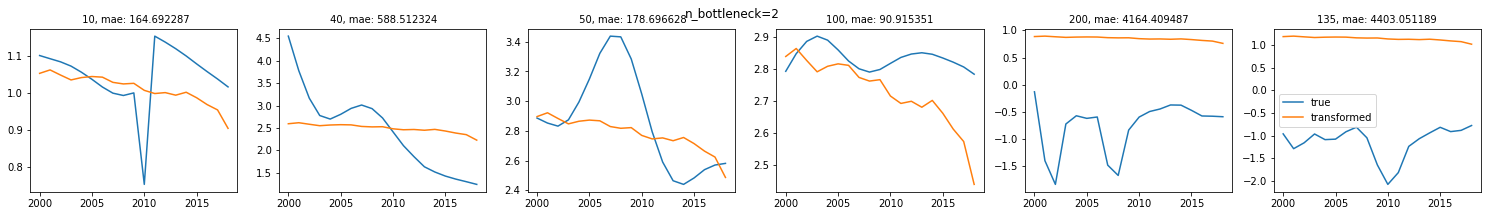

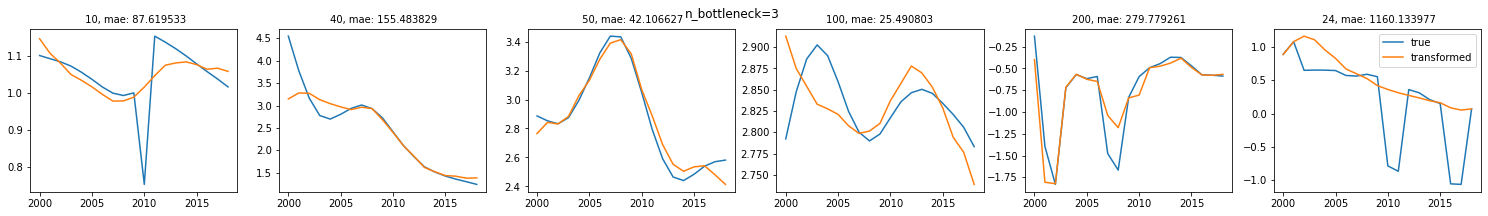

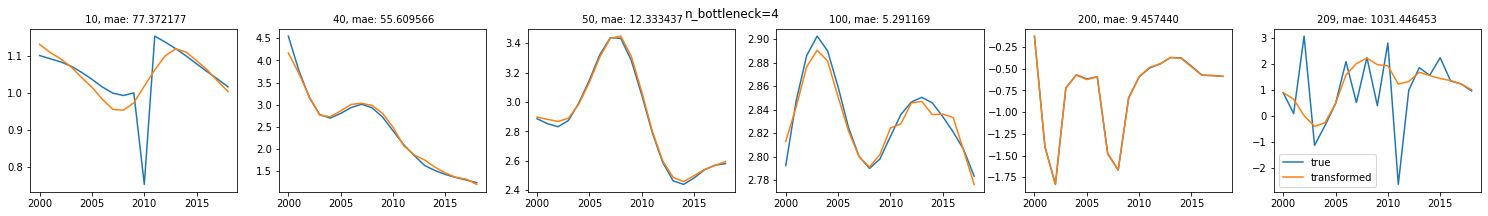

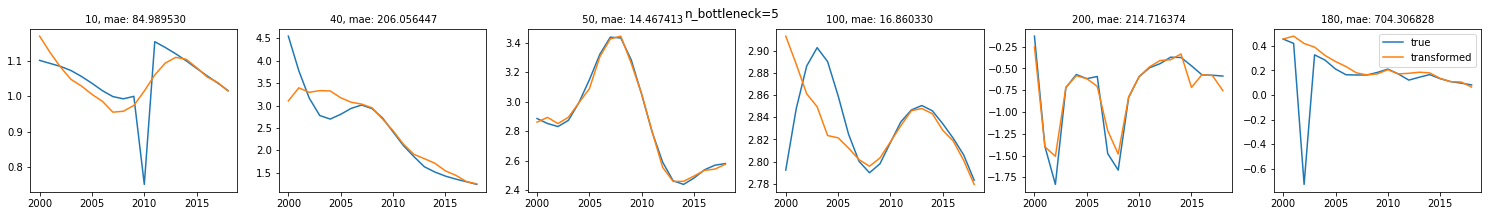

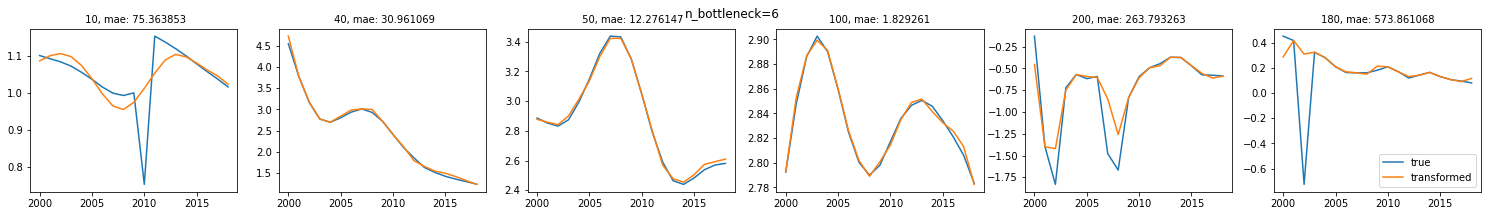

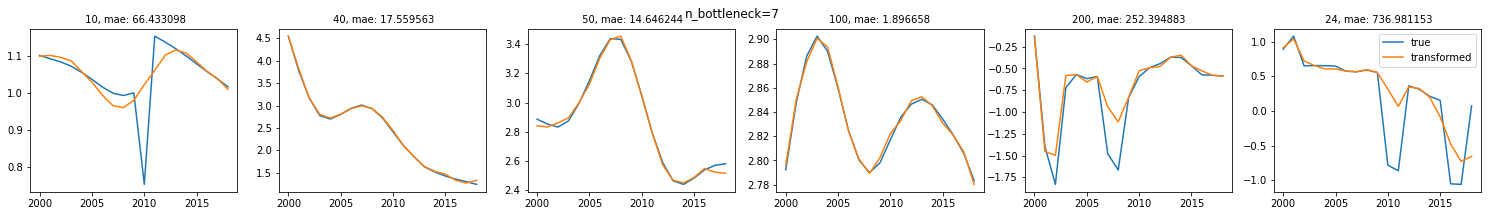

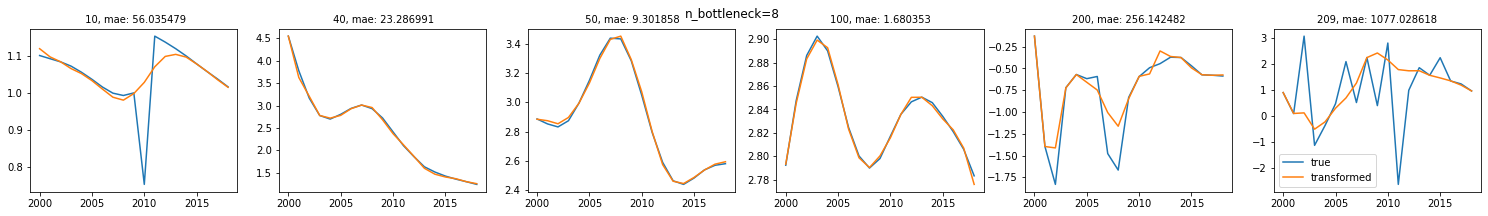

In [34]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v3)

# Autoencoder v4

In [35]:
def create_autoencoder_v4(n_bottleneck, lr=0.001):
    dense_len = (X.shape[1] + 2 - 1) // 2 * 32

    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Reshape((-1, 1)),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(padding="same"),
            tf_layers.Flatten(),
            tf_layers.Dense(n_bottleneck),
            tf_layers.Dense(dense_len),
            tf_layers.Reshape((-1, 32)),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Flatten(),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=lr), loss="mae", loss_weights=MAE_SCALE
    )
    return autoencoder

In [36]:
n_epochs_4 = 6000
histories_autoencoder_v4, models_autoencoder_v4 = test_autoencoder(
    create_autoencoder_v4,
    1,
    9,
    name="autoencoder_v4",
    n_epochs=n_epochs_4,
    train=TRAIN_AUTOENCODERS,
    lr_start=0.004,
    lr_patience=140,
)

Starting 1... 
Starting 2... 
Starting 3... 
Starting 4... 
Starting 5... 
Starting 6... 
Starting 7... 
Starting 8... 


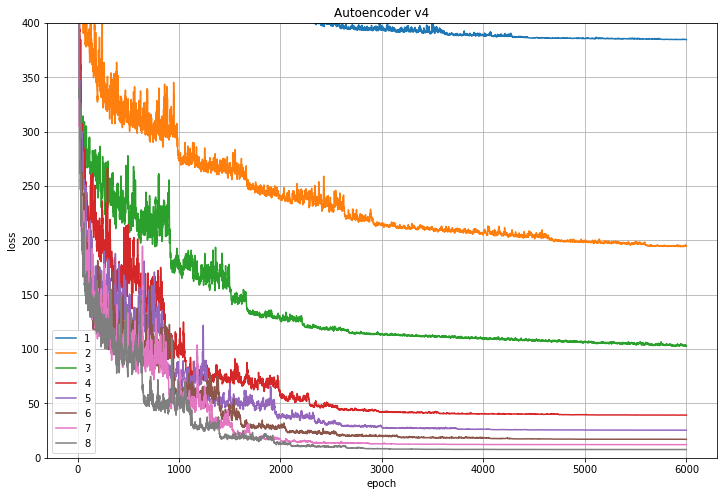

n_bottleneck= 1: mae=384.641357
n_bottleneck= 2: mae=194.259689
n_bottleneck= 3: mae=102.706787
n_bottleneck= 4: mae=39.230129
n_bottleneck= 5: mae=25.402954
n_bottleneck= 6: mae=17.008310
n_bottleneck= 7: mae=12.103016
n_bottleneck= 8: mae=7.611004


In [37]:
plot_histories(histories_autoencoder_v4, "Autoencoder v4", n_epochs=n_epochs_4)

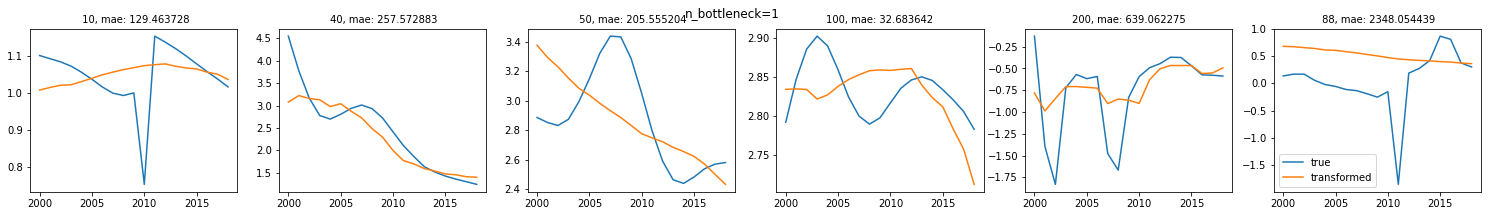

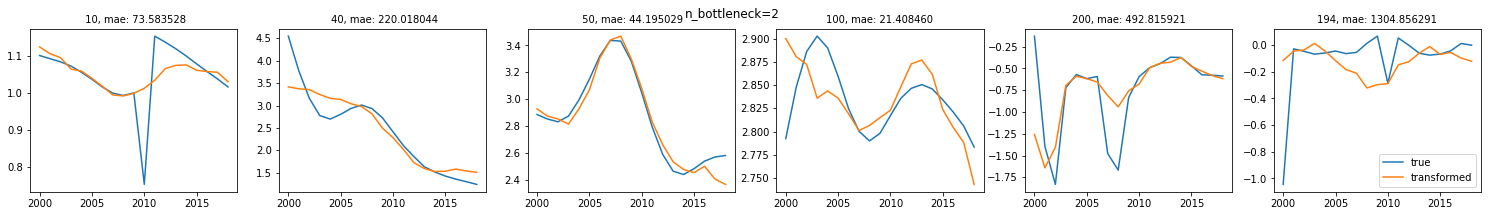

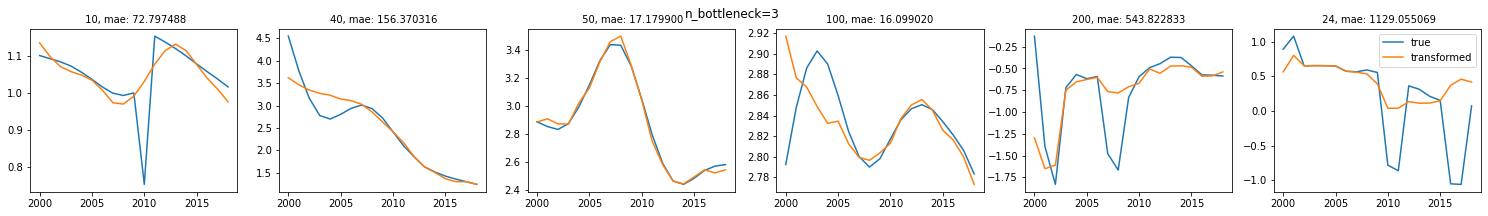

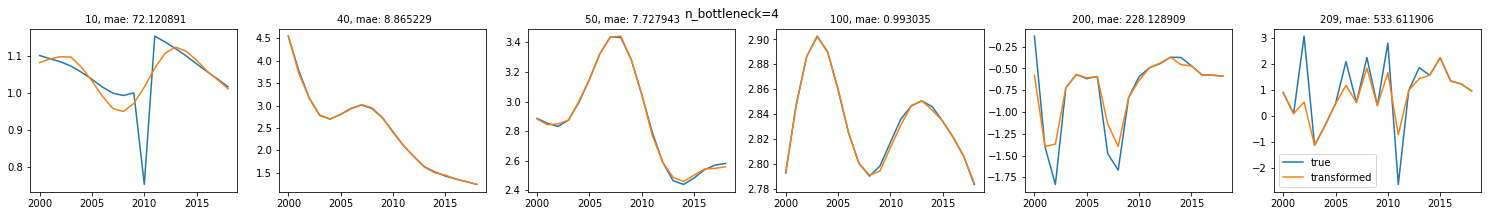

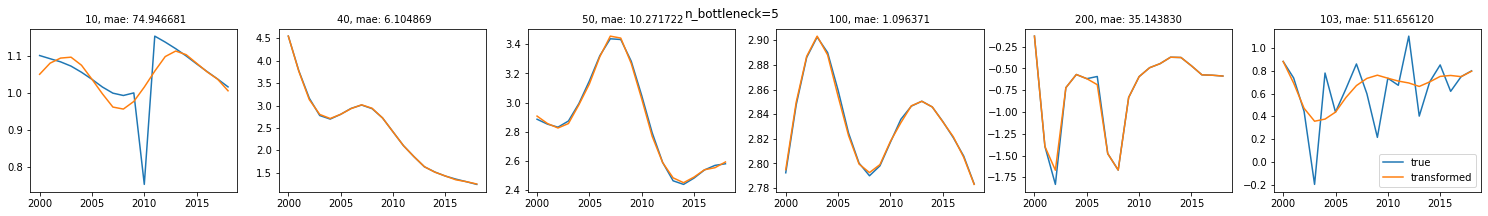

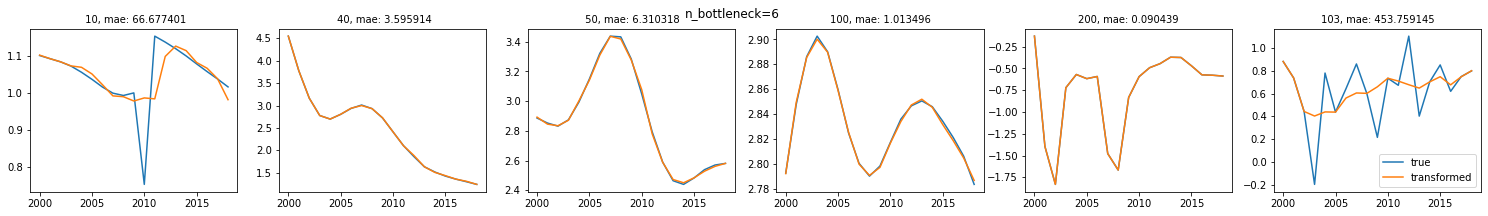

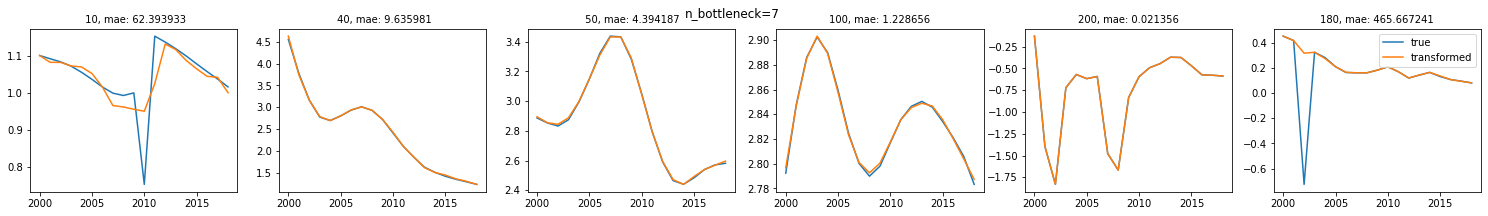

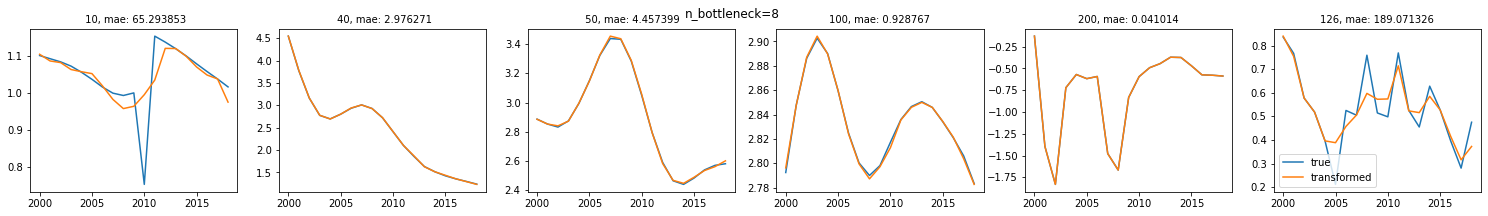

In [38]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v4)

# Autoencoder v5

In [39]:
def create_autoencoder_v5(n_bottleneck, lr=0.001):
    dense_len = (X.shape[1] + 4 - 1) // 4 * 64

    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Reshape((-1, 1)),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(padding="same"),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(padding="same"),
            tf_layers.Flatten(),
            tf_layers.Dense(n_bottleneck),
            tf_layers.Dense(dense_len),
            tf_layers.Reshape((-1, 64)),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Flatten(),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=lr), loss="mae", loss_weights=MAE_SCALE
    )
    return autoencoder

In [40]:
n_epochs_5 = 6000
histories_autoencoder_v5, models_autoencoder_v5 = test_autoencoder(
    create_autoencoder_v5,
    1,
    9,
    name="autoencoder_v5",
    n_epochs=n_epochs_5,
    train=TRAIN_AUTOENCODERS,
    lr_start=0.002,
    lr_patience=140,
)

Starting 1... 
Starting 2... 
Starting 3... 
Starting 4... 
Starting 5... 
Starting 6... 
Starting 7... 
Starting 8... 


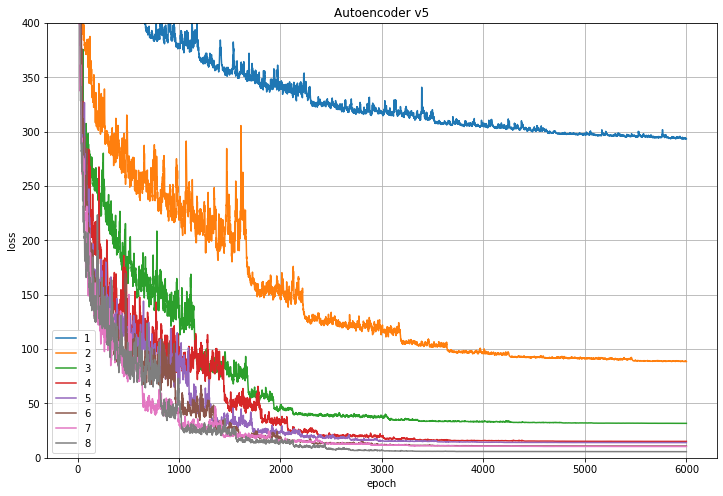

n_bottleneck= 1: mae=293.250031
n_bottleneck= 2: mae=88.414314
n_bottleneck= 3: mae=31.691557
n_bottleneck= 4: mae=15.076754
n_bottleneck= 5: mae=13.970363
n_bottleneck= 6: mae=10.825145
n_bottleneck= 7: mae=10.371074
n_bottleneck= 8: mae=5.617629


In [41]:
plot_histories(histories_autoencoder_v5, "Autoencoder v5", n_epochs=n_epochs_5)

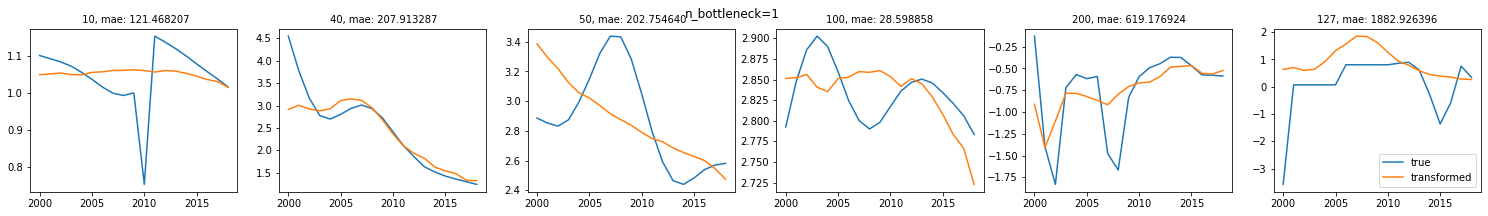

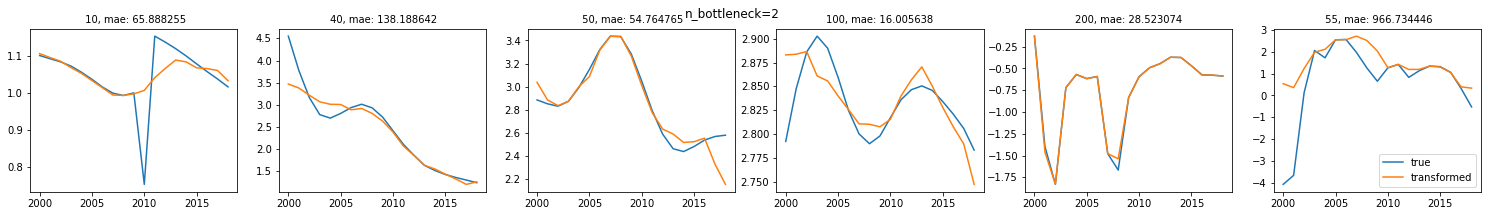

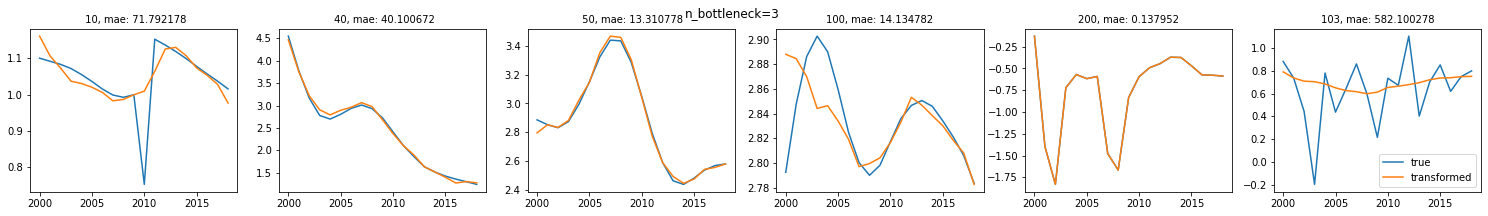

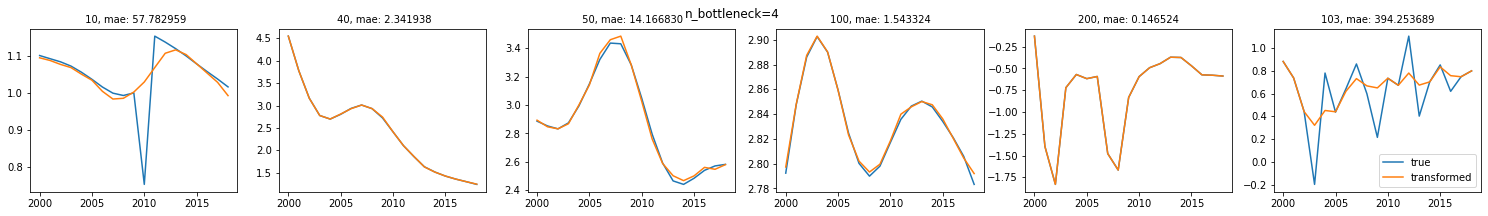

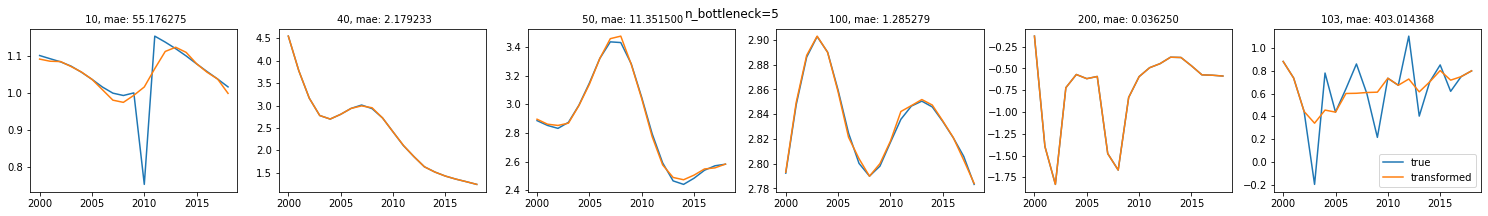

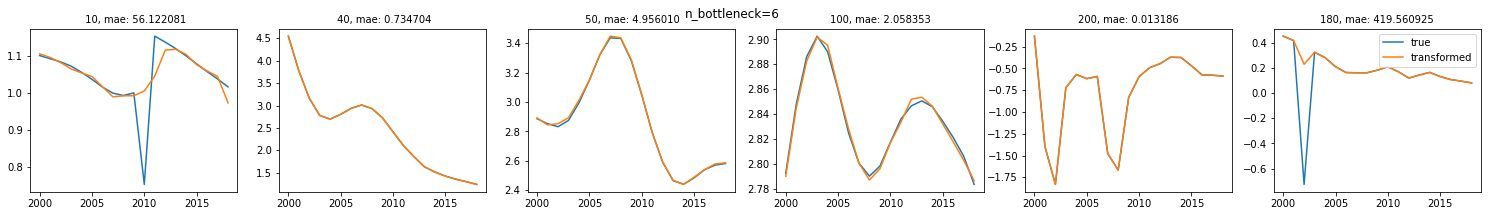

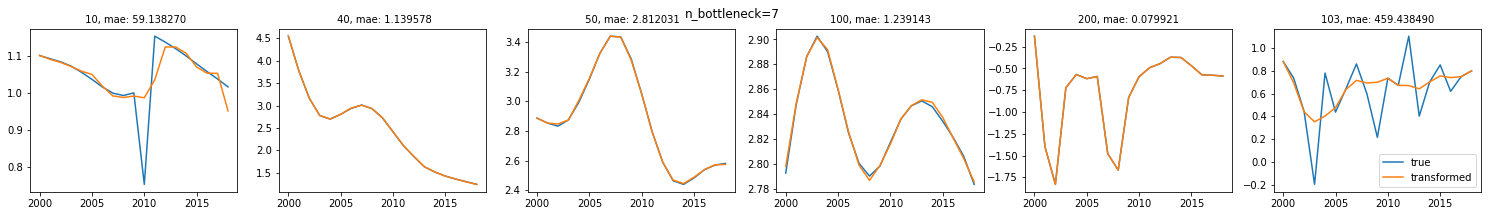

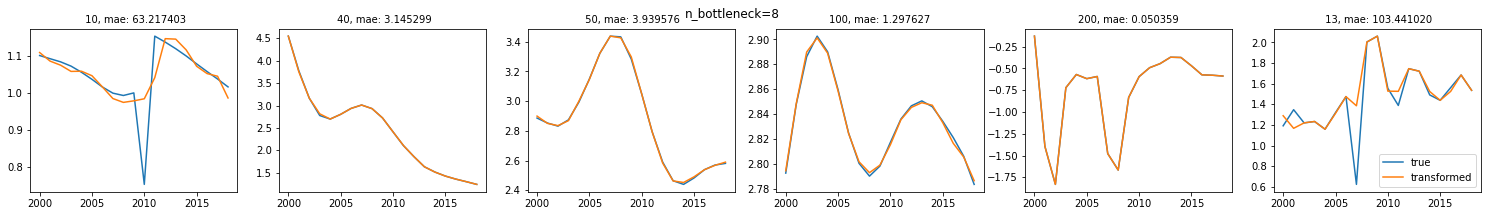

In [42]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v5)

# Autoencoder v6

In [43]:
def create_autoencoder_v6(n_bottleneck, lr=0.001):
    dense_len = (X.shape[1] + 8 - 1) // 8 * 128

    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Reshape((-1, 1)),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(padding="same"),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(padding="same"),
            tf_layers.Conv1D(128, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(padding="same"),
            tf_layers.Flatten(),
            tf_layers.Dense(n_bottleneck),
            tf_layers.Dense(dense_len),
            tf_layers.Reshape((-1, 128)),
            tf_layers.Conv1D(128, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Flatten(),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=lr), loss="mae", loss_weights=MAE_SCALE
    )
    return autoencoder

In [44]:
n_epochs_6 = 8000
histories_autoencoder_v6, models_autoencoder_v6 = test_autoencoder(
    create_autoencoder_v6,
    1,
    9,
    name="autoencoder_v6",
    n_epochs=n_epochs_6,
    train=TRAIN_AUTOENCODERS,
    lr_start=0.002,
    lr_patience=140,
)

Starting 1... 
Starting 2... 
Starting 3... 
Starting 4... 
Starting 5... 
Starting 6... 
Starting 7... 
Starting 8... 


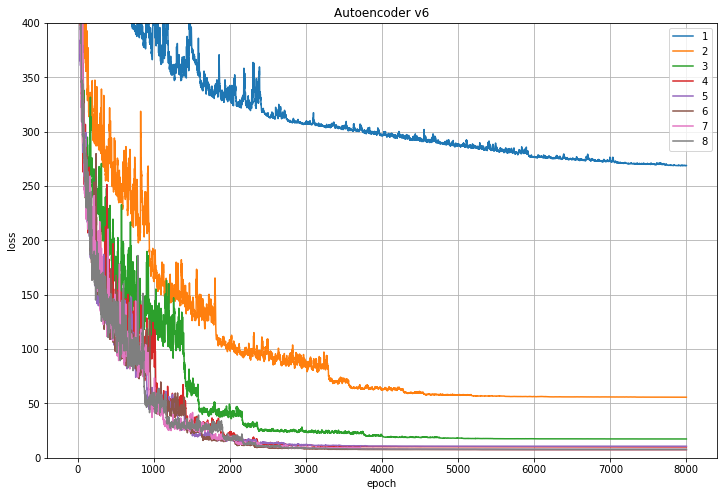

n_bottleneck= 1: mae=268.583405
n_bottleneck= 2: mae=55.735119
n_bottleneck= 3: mae=17.321474
n_bottleneck= 4: mae=9.977202
n_bottleneck= 5: mae=10.657555
n_bottleneck= 6: mae=7.346005
n_bottleneck= 7: mae=7.656971
n_bottleneck= 8: mae=7.867418


In [45]:
plot_histories(histories_autoencoder_v6, "Autoencoder v6", n_epochs=n_epochs_6)

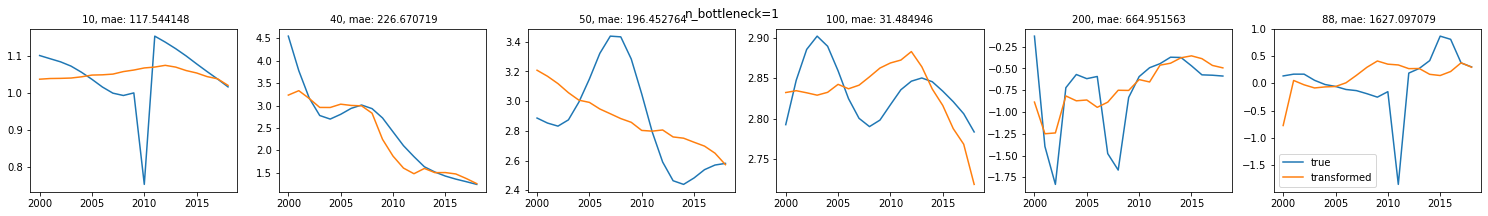

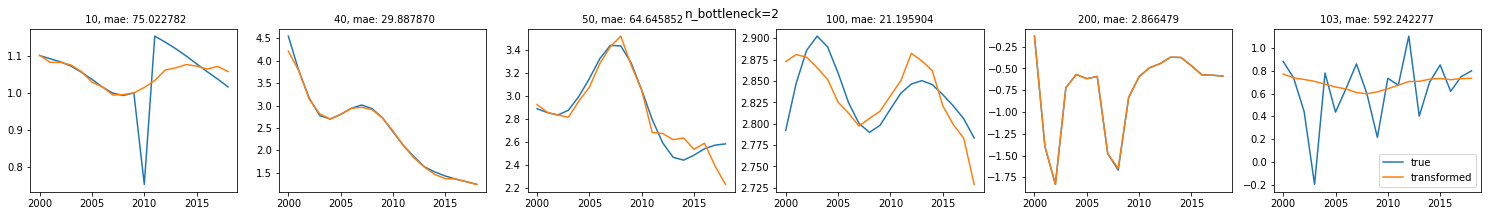

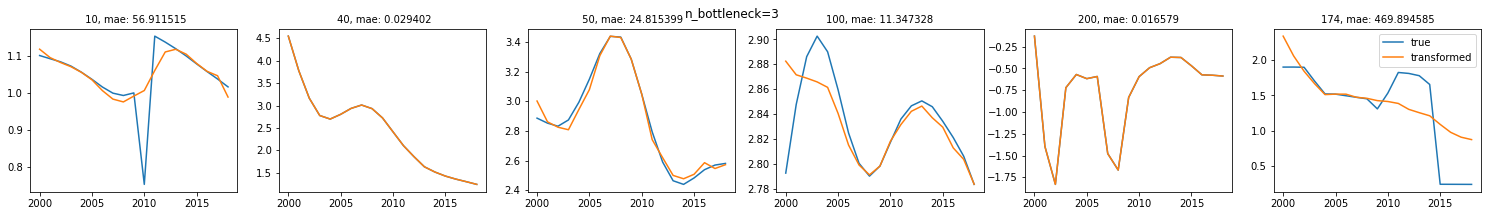

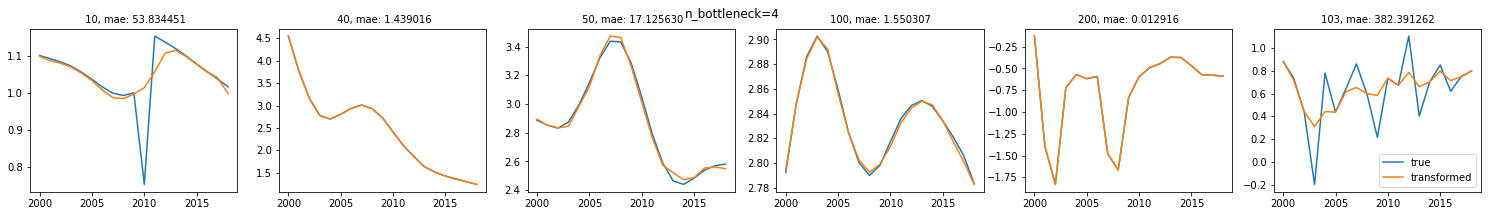

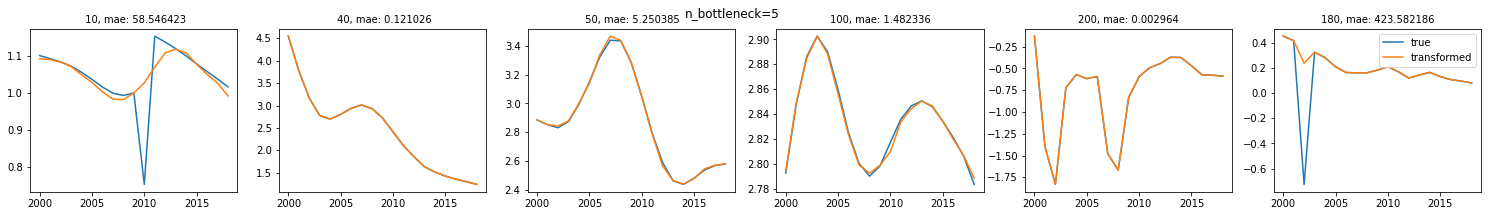

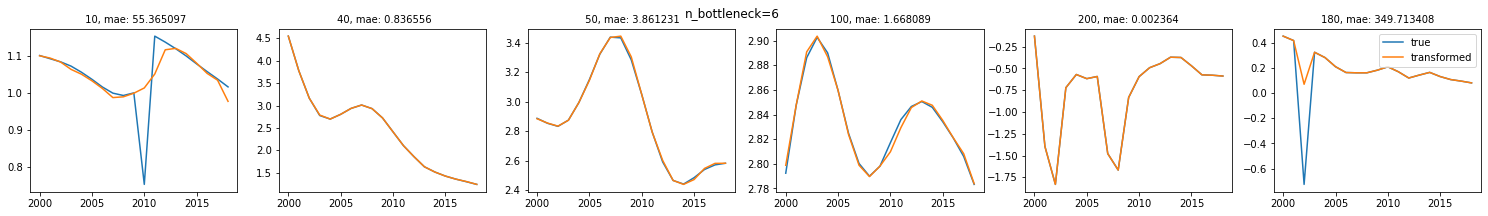

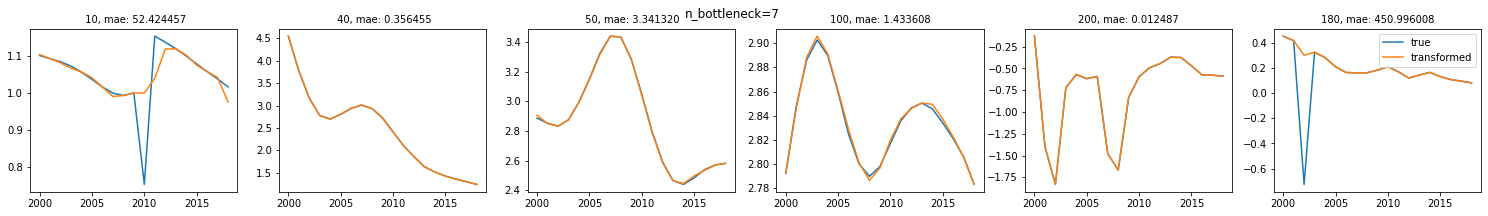

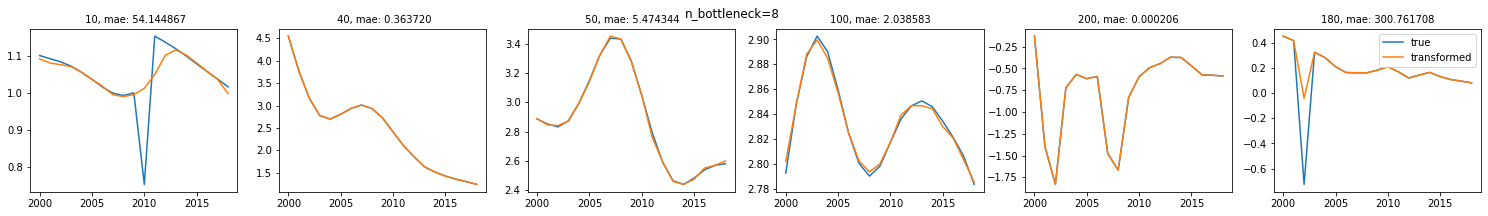

In [46]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v6)

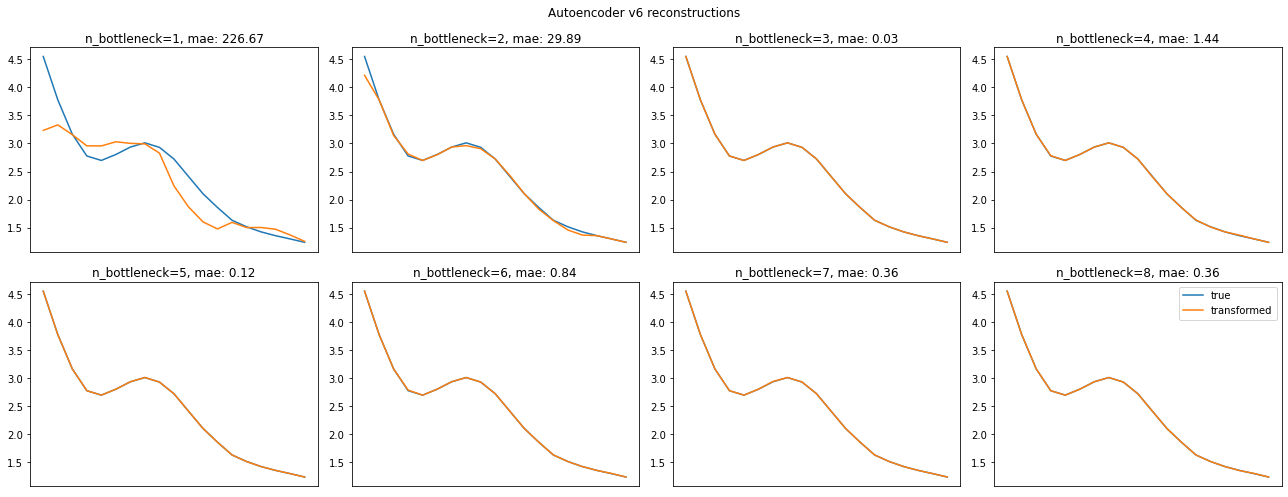

In [47]:
IDX = 40

plt.figure(figsize=(18, 7))
for i, model in models_autoencoder_v6.items():
    X_tmp = model.predict(X)
    mae_list = [mean_absolute_error(x, x_tmp) * MAE_SCALE for x, x_tmp in zip(X, X_tmp)]

    X_tmp = preprocess_inverse(X_tmp)

    plt.subplot(2, 4, i)
    plt.plot(years, X_base[IDX], label="true")
    plt.plot(years, X_tmp[IDX], label="transformed")

    plt.xticks([])
    plt.title(f"n_bottleneck={i}, mae: {mae_list[IDX]:.2f}")

plt.suptitle("Autoencoder v6 reconstructions")
plt.legend()
plt.tight_layout()
plt.savefig("plots/experiments/ae_6_reconstructions.pdf")
plt.show()

---

In [48]:
all_histories = [
    histories_autoencoder_v1,
    histories_autoencoder_v2,
    histories_autoencoder_v3,
    histories_autoencoder_v4,
    histories_autoencoder_v5,
    histories_autoencoder_v6,
]

for i, histories in enumerate(all_histories):
    print(f"{i + 1}: ", end="")
    for n_bottleneck, history in histories.items():
        print(f"{min(history['loss']):6.2f}, ", end="")
    print()

1: 577.99, 381.68, 267.37, 206.60, 132.03, 128.75, 121.68, 114.28, 
2: 413.92, 363.41, 204.80, 181.54, 124.31, 124.96, 116.13, 117.10, 
3: 403.69, 844.00, 136.13,  83.65,  96.58,  49.17,  62.94,  60.76, 
4: 384.64, 194.26, 102.71,  39.23,  25.40,  17.01,  12.10,   7.61, 
5: 293.25,  88.41,  31.69,  15.08,  13.97,  10.83,  10.37,   5.62, 
6: 268.58,  55.74,  17.32,   9.98,  10.66,   7.35,   7.66,   7.87, 


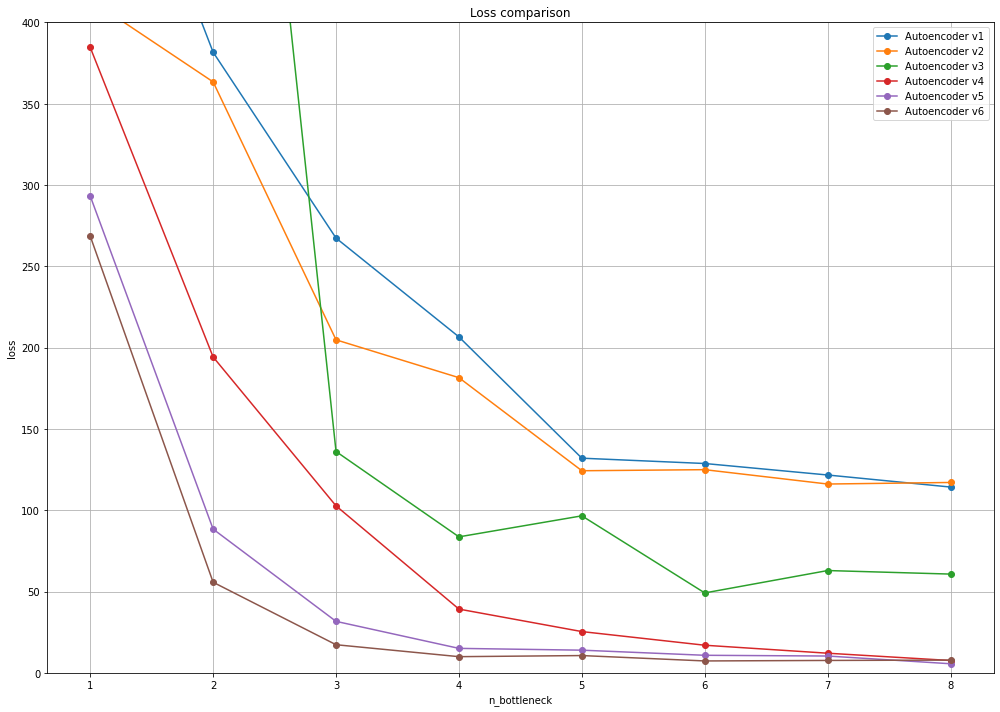

In [49]:
plt.figure(figsize=(14, 10))
for i, histories in enumerate(all_histories):
    plt.plot(
        list(histories.keys()),
        [min(h["loss"]) for h in histories.values()],
        label=f"Autoencoder v{i + 1}",
        marker="o",
    )

plt.xlabel("n_bottleneck")
plt.ylabel("loss")
plt.ylim(0, 400)
plt.grid()
plt.title("Loss comparison")
plt.legend()
plt.tight_layout()
plt.savefig("plots/experiments/loss_comp.pdf")
plt.show()

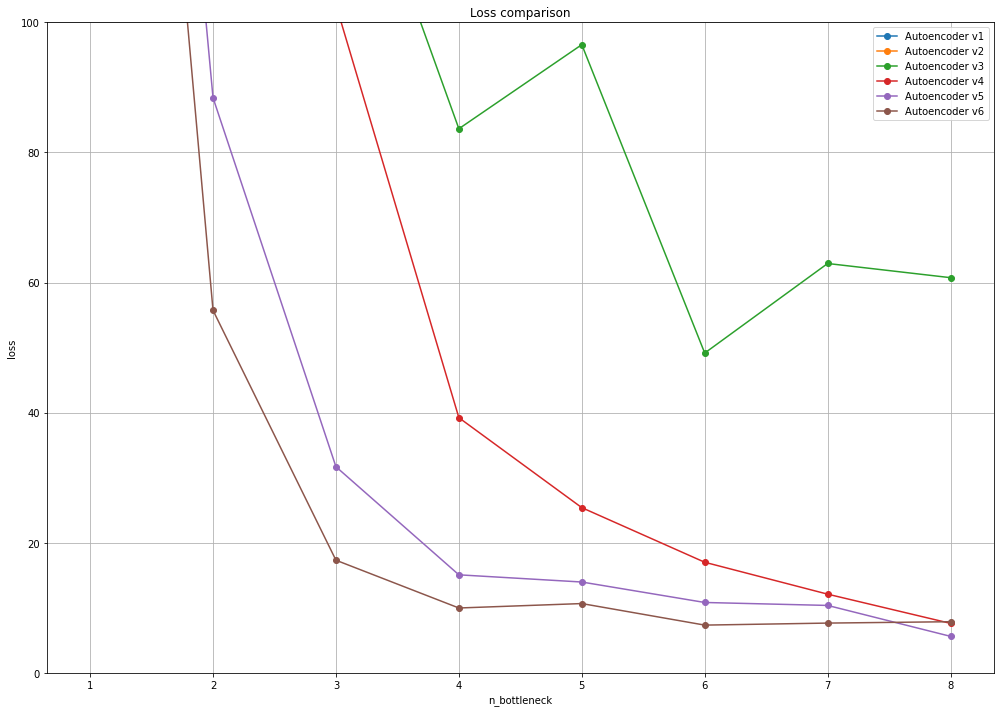

In [50]:
plt.figure(figsize=(14, 10))
for i, histories in enumerate(all_histories):
    plt.plot(
        list(histories.keys()),
        [min(h["loss"]) for h in histories.values()],
        label=f"Autoencoder v{i + 1}",
        marker="o",
    )

plt.xlabel("n_bottleneck")
plt.ylabel("loss")
plt.ylim(0, 100)
plt.grid()
plt.title("Loss comparison")
plt.legend()
plt.tight_layout()
plt.savefig("plots/experiments/loss_comp_2.pdf")
plt.show()